###############################
## 19CSE305 Machine Leaning - PROJECT
## Title: Detecting whether an astronomical object is potentially dangerous or not.
## Group no. 1
## CSE A Batch 2020
################################

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
###### NASA Near Earth Objects Dataset 1
df1 = pd.read_csv("C:/Users/ritik/Jupyter Notebooks/DataSets/Project/neo1.csv")
df1

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
35763,2410627,410627 (2008 RG1),0.192555,0.430566,41201.341902,2.139490e+07,Earth,False,20.70,True
35764,3435023,(2008 UB95),0.029144,0.065169,26165.837177,3.558265e+07,Earth,False,24.80,False
35765,3484581,(2010 AF),0.026580,0.059435,55428.456645,6.075627e+07,Earth,False,25.00,False
35766,3557196,(2011 CC22),0.167708,0.375008,78171.854692,5.601149e+07,Earth,False,21.00,True


In [36]:
###### NASA Near Earth Objects Dataset 2
df2 = pd.read_csv("C:/Users/ritik/Jupyter Notebooks/DataSets/Project/NASA neo.csv")
df2

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,54138696,(2021 GY23),0.036354,0.081291,64086.001325,7.134321e+07,Earth,False,24.32,False
1,3092227,(1999 LW1),0.231502,0.517654,75836.708102,7.296337e+07,Earth,False,20.30,False
2,3574334,(2011 OC18),0.175612,0.392681,18362.139024,2.665116e+07,Earth,False,20.90,False
3,3574821,(2011 PO1),0.175612,0.392681,50931.795844,1.611580e+07,Earth,False,20.90,True
4,3627010,(2013 CL129),0.005553,0.012418,51220.341581,4.381180e+07,Earth,False,28.40,False
...,...,...,...,...,...,...,...,...,...,...
34226,3883102,(2019 UA8),0.080270,0.179490,19206.964200,6.016612e+07,Earth,False,22.60,False
34227,3892192,(2019 UW13),0.018389,0.041119,76548.052605,5.223810e+07,Earth,False,25.80,False
34228,3893643,(2019 WL4),0.127220,0.284472,98619.378019,4.505315e+07,Earth,False,21.60,True
34229,54087741,(2020 VY2),0.046191,0.103286,51599.340955,2.834316e+07,Earth,False,23.80,False


In [37]:
###### NASA Near Earth Objects Dataset 3
df3 = pd.read_csv("C:/Users/ritik/Jupyter Notebooks/DataSets/Project/NEO Earth NASA.csv")
df3

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,54216180,(2021 VH1),0.013821,0.030906,69849.092231,4.820930e+07,Earth,False,26.42,False
1,2279816,279816 (2000 JE5),0.385971,0.863058,120635.519828,4.081123e+07,Earth,False,19.19,True
2,3063823,(2000 WP19),0.076658,0.171412,37542.511348,8.771938e+06,Earth,False,22.70,False
3,3512277,(2010 FM),0.010105,0.022596,43220.662503,5.658756e+07,Earth,False,27.10,False
4,3733260,(2015 VY1),0.192555,0.430566,43493.478140,4.362921e+07,Earth,False,20.70,False
...,...,...,...,...,...,...,...,...,...,...
20831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
20832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
20833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
20834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [38]:
#### Combining all datasets
df = pd.concat([df1,df2,df3],axis=0, ignore_index=True) # Combining df1, df2 and df3
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90830,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90831,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90832,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90833,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [39]:
######## Testing for NULL values in the dataset
print(df.isnull().values.any())

False


In [40]:
###### Removing Irrelevant data based on our requirement
# Id: Not significant for our model
# Name: Not significant for our project
# Orbiting Body: Value is 'Earth' for all rows
df = df.drop(['id','name','orbiting_body'], axis = 1)
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,False,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,False,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,False,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,False,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,False,20.09,True
...,...,...,...,...,...,...,...
90830,0.026580,0.059435,52078.886692,1.230039e+07,False,25.00,False
90831,0.016771,0.037501,46114.605073,5.432121e+07,False,26.00,False
90832,0.031956,0.071456,7566.807732,2.840077e+07,False,24.60,False
90833,0.007321,0.016370,69199.154484,6.869206e+07,False,27.80,False


In [41]:
######### Refining Data, converting String Booleans (True/False) to Binary Boolean(0/1)
# Hazardous: Is the target Variable
df['hazardous'] = df['hazardous'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90835 entries, 0 to 90834
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90835 non-null  float64
 1   est_diameter_max    90835 non-null  float64
 2   relative_velocity   90835 non-null  float64
 3   miss_distance       90835 non-null  float64
 4   sentry_object       90835 non-null  bool   
 5   absolute_magnitude  90835 non-null  float64
 6   hazardous           90835 non-null  int32  
dtypes: bool(1), float64(5), int32(1)
memory usage: 3.9 MB


#### DATA Summarization

<AxesSubplot: >

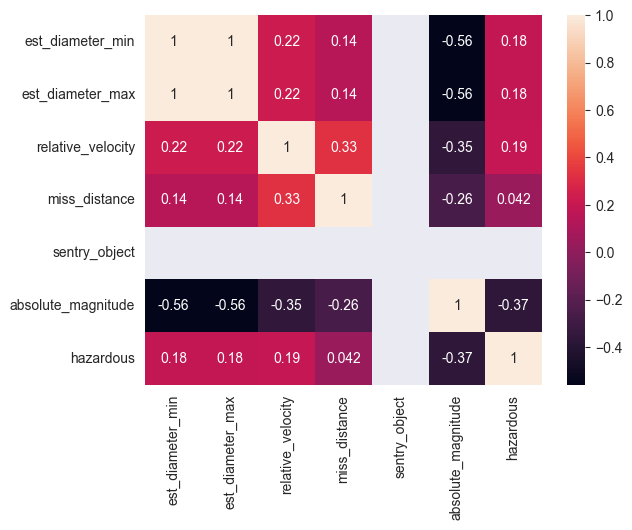

In [42]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [43]:
# Sentry_Object: Value does not have any correlation with other Features hence removing it
df = df.drop(['sentry_object'], axis=1)
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1
...,...,...,...,...,...,...
90830,0.026580,0.059435,52078.886692,1.230039e+07,25.00,0
90831,0.016771,0.037501,46114.605073,5.432121e+07,26.00,0
90832,0.031956,0.071456,7566.807732,2.840077e+07,24.60,0
90833,0.007321,0.016370,69199.154484,6.869206e+07,27.80,0


In [44]:
#### DATASET Dimensions
df.shape

(90835, 6)

In [45]:
#### DATASET Statistical Summary
numeric_df = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
df[numeric_df].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90835.000000,90835.000000,90835.000000,9.083500e+04,90835.000000
mean,0.127432,0.284948,48067.331695,3.706651e+07,23.527119
std,0.298513,0.667495,25293.130231,2.235216e+07,2.894098
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.877922,1.721076e+07,21.340000
50%,0.048368,0.108153,44190.127579,3.784584e+07,23.700000
75%,0.143402,0.320656,62923.664807,5.654961e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


#### DATA Visualization

<Figure size 3000x3000 with 0 Axes>

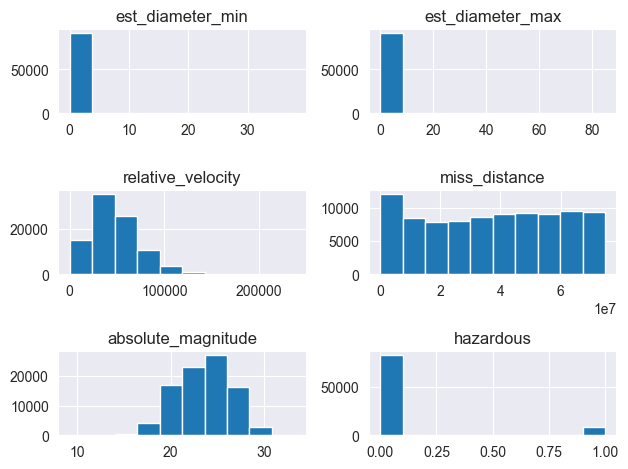

In [46]:
plt.figure(figsize=(30,30))
df.hist()
plt.tight_layout()
plt.show()

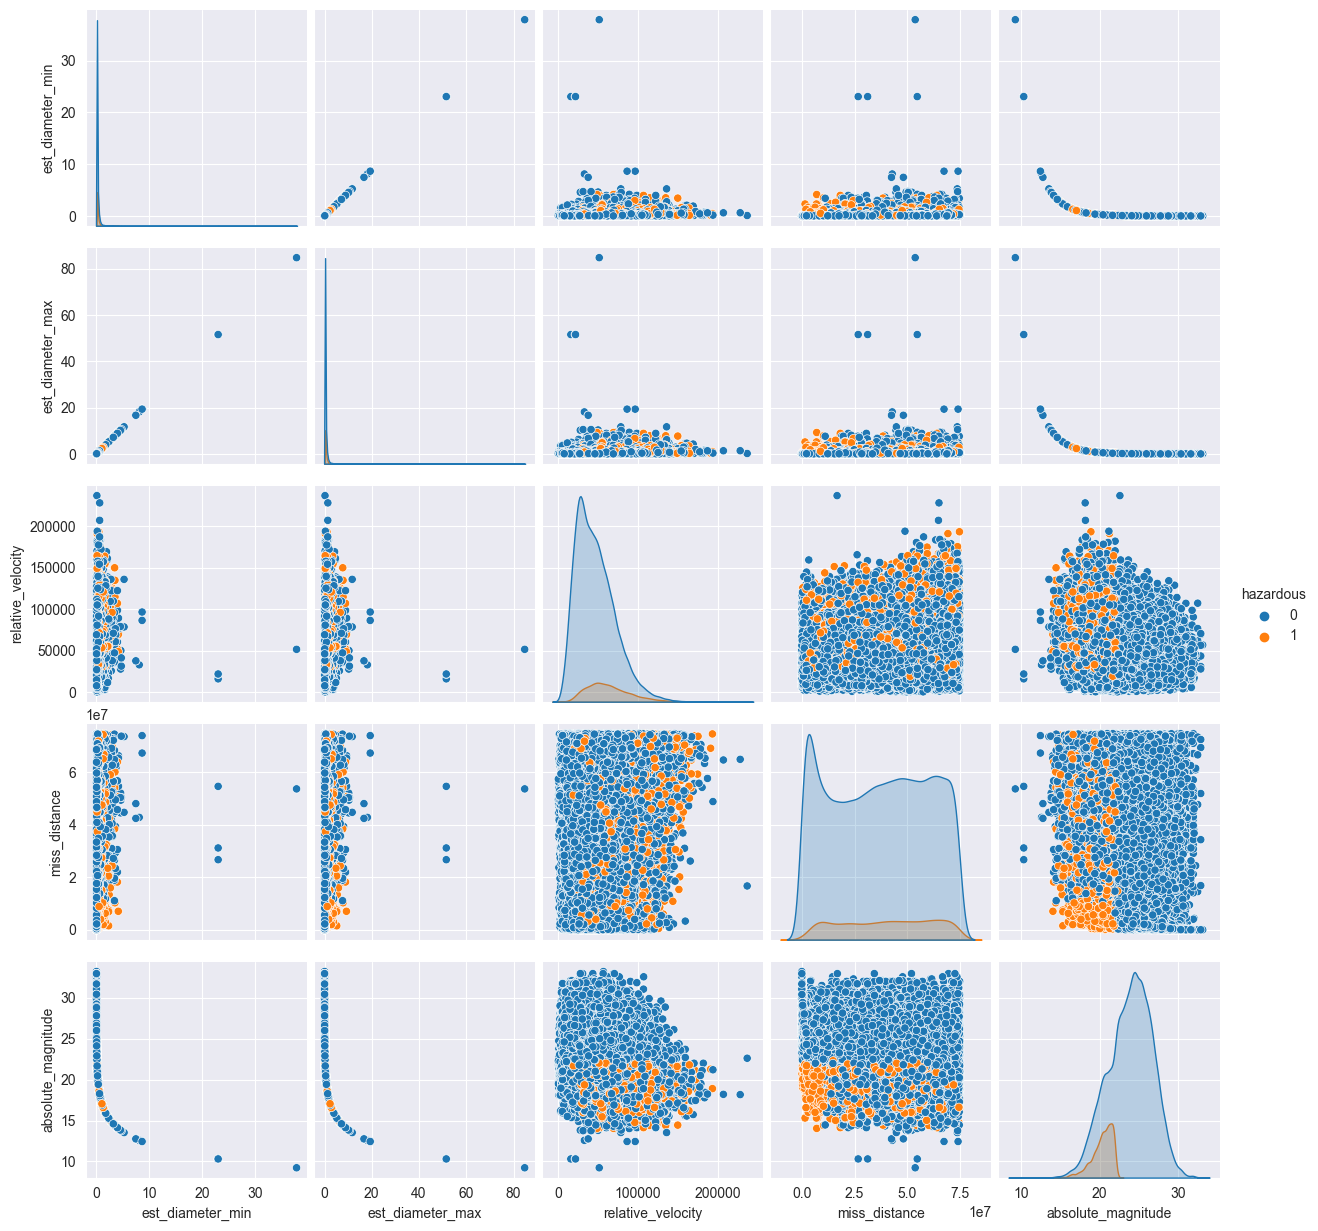

In [47]:
######### Plotting the target variable with all the Features
sns.pairplot(df, hue="hazardous")
plt.show()

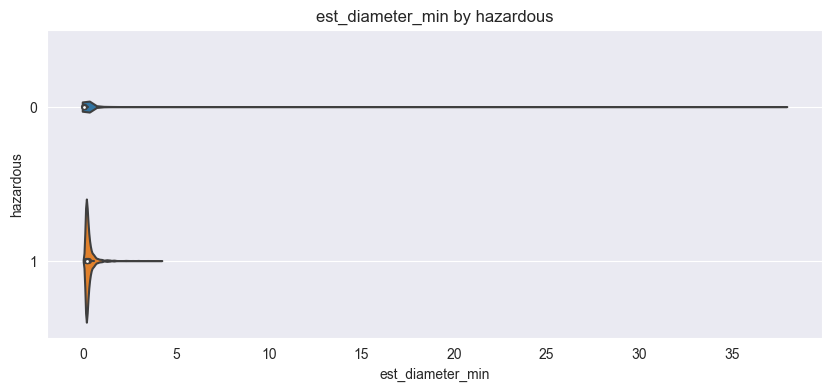

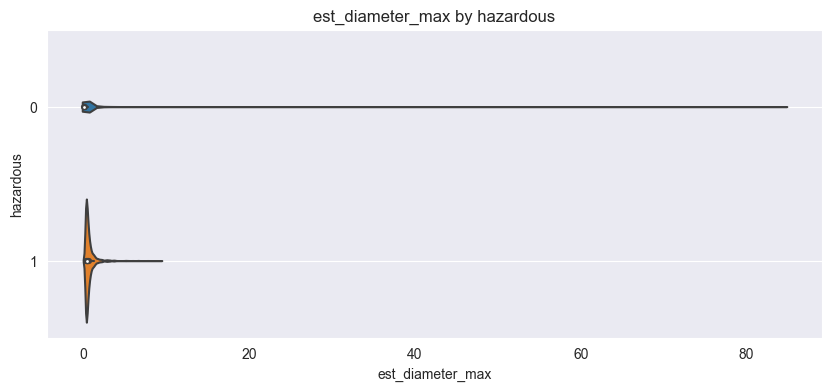

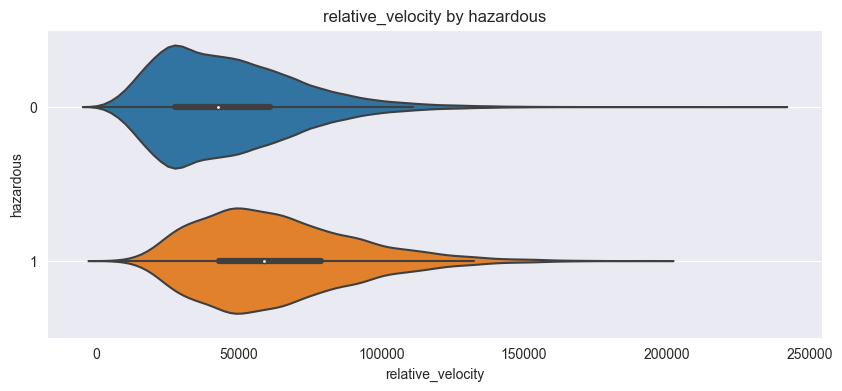

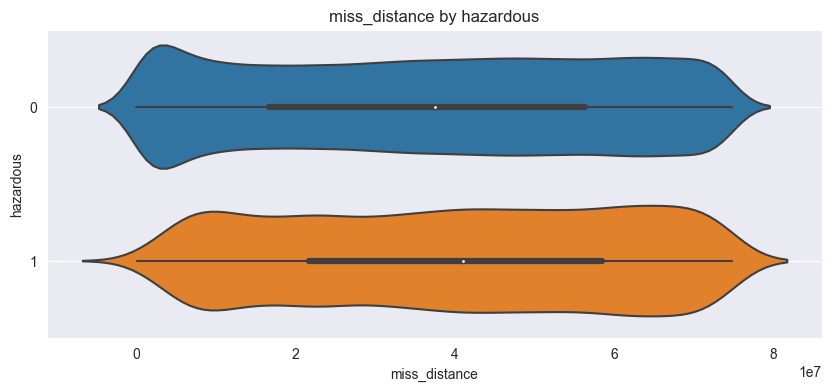

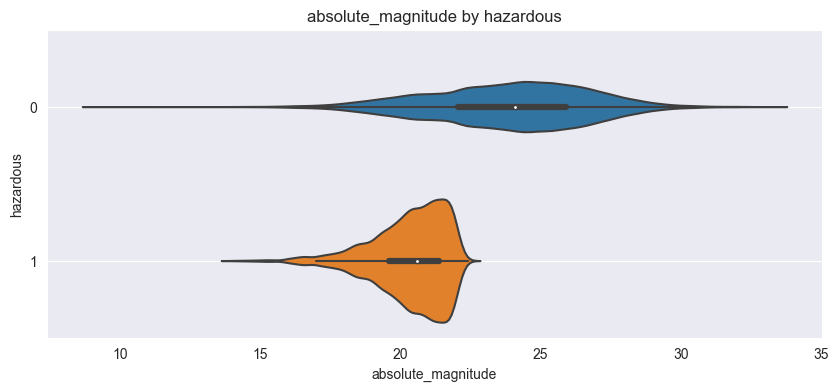

In [48]:
for k in numeric_df:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df, x=k, y='hazardous', orient='h')
    title = k + ' by hazardous'
    plt.title(title)
    plt.grid()

##### Splitting the dataset into train and test sets

In [49]:
from sklearn.preprocessing import Normalizer
categ = df.columns
transformer = Normalizer().fit(df[categ[0:-1]])
X = transformer.transform(df[categ[0:-1]])
y = (df[['hazardous']])
y = np.array(y)

#### MODELS

In [50]:
from sklearn.metrics import accuracy_score,explained_variance_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [51]:
# KNN Model
def model_KNN(x_tr, y_tr, x_te, y_te):
    KNN = KNeighborsClassifier(n_neighbors = 3)
    KNN.fit(x_tr, y_tr)
    KNN_pred = KNN.predict(x_te)
    Acc_KNN = round(accuracy_score(KNN_pred, y_te) * 100, 2)
    return Acc_KNN

# RandomForest Model
def model_RFS(x_tr, y_tr, x_te, y_te):
    RF = RandomForestClassifier()
    RF.fit(x_tr, y_tr)
    RF_pred = RF.predict(x_te)
    Acc_RF = round(accuracy_score(RF_pred, y_te) * 100, 2)
    return Acc_RF

# SVM Model
def model_SVM(x_tr, y_tr, x_te, y_te):
    SVM = SVC(kernel='linear', C = 1.0)
    SVM.fit(x_tr, y_tr)
    SVM_pred = SVM.predict(x_te)
    Acc_SVM = round(accuracy_score(SVM_pred, y_te) * 100, 2)
    return Acc_SVM

# Gaussian Naive Bayes Model
def model_Gaussian_NB(x_tr, y_tr, x_te, y_te):
    GNB = GaussianNB()
    GNB.fit(x_tr, y_tr)
    GNB_pred = GNB.predict(x_te)
    Acc_GNB = round(accuracy_score(GNB_pred,y_te) * 100, 2)
    return Acc_GNB

# DecisionTree Model
def model_DTC(x_tr, y_tr, x_te, y_te):
    DTC = DecisionTreeClassifier()
    DTC.fit(x_tr, y_tr)
    DTC_pred = DTC.predict(x_te)
    Acc_DTC = round(accuracy_score(DTC_pred, y_te) * 100, 2)
    return Acc_DTC

In [52]:
# Print all models
cols = ['Random Forest', 'Support Vector Machine','Gaussian Naive Bayes','K Neighbors Classifier','Decision Tree Classifier']
models = pd.DataFrame(columns=cols)
def print_res(ans_RF,ans_SVM,ans_GNB,ans_KNN,ans_DTC):
    rows = [ans_RF,ans_SVM,ans_GNB,ans_KNN,ans_DTC]
    models.loc[len(models.index)] = rows

In [53]:
def K_Folf_Validation(K):
    kf = KFold(n_splits=K,random_state=None)
    for train_index,test_index in kf.split(X):
        X_train,X_test = X[train_index],X[test_index]
        y_train,y_test = y[train_index],y[test_index]
        y_train = y_train.ravel()
        y_test = y_test.ravel()
        res_RFS = model_RFS(X_train,y_train,X_test,y_test)
        res_KNN = model_KNN(X_train,y_train,X_test,y_test)
        res_SVM = model_SVM(X_train,y_train,X_test,y_test)
        res_GNB = model_Gaussian_NB(X_train,y_train,X_test,y_test)
        res_DTC = model_DTC(X_train,y_train,X_test,y_test)
        print_res(res_RFS,res_SVM,res_GNB,res_KNN,res_DTC)

In [54]:
#### K Fold for 3 fold
K_Folf_Validation(3)
x3 = models[0:len(models.index)].agg('mean')
models[0:len(models.index)]

,Random Forest,Support Vector Machine,Gaussian Naive Bayes,K Neighbors Classifier,Decision Tree Classifier
0,88.17,88.09,14.58,85.82,85.04
1,90.79,90.75,15.33,88.14,87.29
2,91.98,91.96,17.54,89.25,88.45


In [55]:
#### K Fold for 5 fold
K_Folf_Validation(5)
x5 = models[3:len(models.index)].agg('mean')
models[3:len(models.index)]

,Random Forest,Support Vector Machine,Gaussian Naive Bayes,K Neighbors Classifier,Decision Tree Classifier
3,87.70,87.63,14.42,85.26,85.17
4,89.05,89.01,14.41,86.51,85.90
5,91.05,91.00,15.54,88.57,87.84
6,91.14,91.09,15.21,88.74,88.11
7,92.63,92.61,19.47,90.08,89.35


In [56]:
#### K Fold for 7 fold
K_Folf_Validation(7)
x7 = models[8:len(models.index)].agg('mean')
models[8:len(models.index)]

,Random Forest,Support Vector Machine,Gaussian Naive Bayes,K Neighbors Classifier,Decision Tree Classifier
8,87.60,87.54,14.23,84.97,84.95
9,88.35,88.29,14.71,86.04,85.88
10,89.52,89.47,14.36,87.05,86.27
11,91.09,91.05,15.78,88.82,88.25
12,91.28,91.21,15.37,88.84,88.22
13,91.75,91.74,16.34,89.36,88.98
14,92.59,92.56,19.74,90.12,89.22


In [57]:
models

,Random Forest,Support Vector Machine,Gaussian Naive Bayes,K Neighbors Classifier,Decision Tree Classifier
0,88.17,88.09,14.58,85.82,85.04
1,90.79,90.75,15.33,88.14,87.29
2,91.98,91.96,17.54,89.25,88.45
3,87.70,87.63,14.42,85.26,85.17
4,89.05,89.01,14.41,86.51,85.90
5,91.05,91.00,15.54,88.57,87.84
6,91.14,91.09,15.21,88.74,88.11
7,92.63,92.61,19.47,90.08,89.35
8,87.60,87.54,14.23,84.97,84.95
9,88.35,88.29,14.71,86.04,85.88


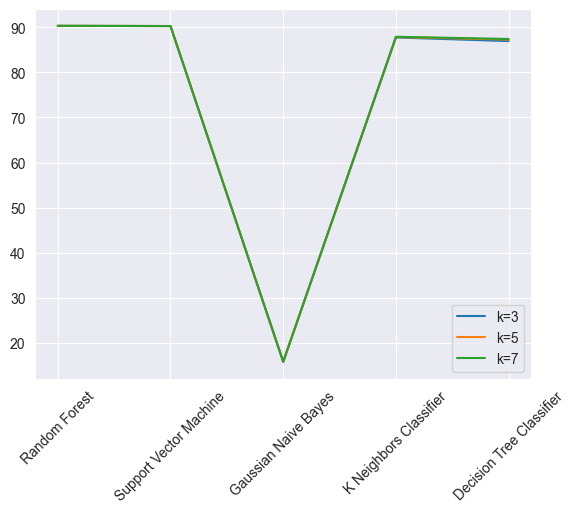

In [58]:
plt.plot(cols,x3,label = "k=3")
plt.plot(cols,x5,label = "k=5")
plt.plot(cols,x7,label = "k=7")
plt.legend(loc = 'lower right')
plt.xticks(rotation = 45)
plt.show()